**Install scorecardpy**
This is a python version of R package scorecard. The API link has more info :

https://pypi.org/project/scorecardpy/

https://github.com/shichenxie/scorecardpy/

https://cran.r-project.org/web/packages/scorecard/scorecard.pdf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
warnings.filterwarnings('ignore')
import scorecardpy as sc
import pprint

In [2]:
pd.options.display.max_columns = None


In [3]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Filter Data

In [4]:
full_data = pd.read_csv('IS453 Group Assignment - Data.csv')

#use a copy of hmeq_data for credit risk model
full_data_orig = full_data.copy()

full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   STATUS                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [5]:
full_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [6]:
# Extract the data required for our analysis which is: 
# ['OCCUPATION_TYPE'] = 'Drivers', 'Realty agents', maybe 'Sales staff'? 
# ['ORGANIZATION_TYPE'] = 'Self-employed', 'Realtor' 

df_filtered = full_data[(full_data["OCCUPATION_TYPE"] == 'Drivers') | (full_data["OCCUPATION_TYPE"] == 'Realty agents')  ]

df_filtered #19354 rows × 75 columns

,STATUS,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
13,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-14086,-3028,-643.0,-4911,23.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,NaN,0.566907,0.770087,0.1474,0.0,0.0,0.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
16,0,Cash loans,M,N,N,0,108000.0,509602.5,26149.5,387000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931,-1317,-6392.0,-3866,NaN,1,1,0,1,0,0,Drivers,2.0,2,2,THURSDAY,12,0,0,0,1,1,0,Government,NaN,0.236378,0.062103,NaN,0.0,0.0,0.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
24,0,Cash loans,M,Y,N,2,135000.0,247500.0,12703.5,247500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286,-746,-108.0,-3729,7.0,1,1,0,1,0,0,Drivers,4.0,2,2,THURSDAY,14,0,0,0,0,1,1,Business Entity Type 3,NaN,0.786179,0.565608,0.1433,1.0,1.0,1.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
33,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,3.0,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,NaN,0.321745,0.411849,NaN,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
37,0,Cash loans,M,N,Y,0,121500.0,454500.0,15151.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.030755,-21077,-1288,-5474.0,-4270,NaN,1,1,0,1,1,0,Drivers,2.0,2,2,FRIDAY,10,0,0,0,0,1,1,Transport: type 4,0.804586,0.719799,0.722393,NaN,0.0,0.0,0.0,0.0,-1541.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307425,0,Revolving loans,M,Y,Y,2,234000.0,450000.0,22500.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.022800,-11943,-3214,-5994.0,-3520,7.0,1,1,0,1,0,0,Drivers,4.0,2,2,FRIDAY,13,0,1,1,0,1,1,Industry: type 9,0.216368,0.414246,0.384207,NaN,0.0,0.0,0.0,0.0,-1911.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307432,0,Cash loans,M,N,Y,0,135000.0,840951.0,42934.5,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House /

In [7]:
#use a copy of df_filtered for credit risk model
df_filtered_forsc = df_filtered.copy() #19354 rows × 75 columns

In [8]:
# df_filtered_forsc
# after dropping code gender, days 1711 rows x 75 columns

# drop irrelevant/ bias variables
# CODE_GENDER
# DAYS_BIRTH

biased_col = ['CODE_GENDER']
df_filtered_forsc = df_filtered_forsc.drop(columns = biased_col) # 19354 rows × 73 columns

In [9]:
total_null_values_by_col = pd.DataFrame(df_filtered_forsc.isnull().sum(axis = 0))
total_null_values_by_col['pct_null'] = (total_null_values_by_col[0]/(len(df_filtered_forsc)) * 100).round(5)
total_null_values_by_col.sort_values(by= 0, ascending= False)

,0,pct_null
EXT_SOURCE_1,12075,62.39020
APARTMENTS_AVG,10802,55.81275
OWN_CAR_AGE,6302,32.56174
EXT_SOURCE_3,4123,21.30309
AMT_REQ_CREDIT_BUREAU_HOUR,2749,14.20378
AMT_REQ_CREDIT_BUREAU_YEAR,2749,14.20378
AMT_REQ_CREDIT_BUREAU_DAY,2749,14.20378
AMT_REQ_CREDIT_BUREAU_WEEK,2749,14.20378
AMT_REQ_CREDIT_BUREAU_QRT,2749,14.20378
AMT_REQ_CREDIT_BUREAU_MON,2749,14.20378


In [10]:
total_null_values_by_col[total_null_values_by_col['pct_null'] > 10].index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object')

# pc_missing analysis

In [11]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

In [12]:
columns_infoDF = show_missing(df_filtered_forsc)
columns_infoDF

,variable,dtype,count,unique,missing,pc_missing
0,STATUS,int64,19354,2,0,0.00
1,NAME_CONTRACT_TYPE,object,19354,2,0,0.00
2,FLAG_OWN_CAR,object,19354,2,0,0.00
3,FLAG_OWN_REALTY,object,19354,2,0,0.00
4,CNT_CHILDREN,int64,19354,8,0,0.00
5,AMT_INCOME_TOTAL,float64,19354,253,0,0.00
6,AMT_CREDIT,float64,19354,2410,0,0.00
7,AMT_ANNUITY,float64,19354,5750,1,0.01
8,AMT_GOODS_PRICE,float64,19354,399,13,0.07
9,NAME_TYPE_SUITE,object,19354,8,85,0.44


### Columns that only have 1 unique value

In [13]:
unique_var_df = columns_infoDF[columns_infoDF['unique'] == 1]
cat_var_list = list(unique_var_df['variable'])
print(str(len(cat_var_list)) + " Categorical Variables are " + str(cat_var_list))

5 Categorical Variables are ['FLAG_MOBIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12']


### Categorical Variables

In [14]:
cat_var_df = columns_infoDF[(columns_infoDF['dtype'] == 'object') |  (columns_infoDF['unique'] == 2)]
cat_var_df
# cat_var_df.info() => 11 categorical variables 

,variable,dtype,count,unique,missing,pc_missing
0,STATUS,int64,19354,2,0,0.00
1,NAME_CONTRACT_TYPE,object,19354,2,0,0.00
2,FLAG_OWN_CAR,object,19354,2,0,0.00
3,FLAG_OWN_REALTY,object,19354,2,0,0.00
9,NAME_TYPE_SUITE,object,19354,8,85,0.44
10,NAME_INCOME_TYPE,object,19354,4,0,0.00
11,NAME_EDUCATION_TYPE,object,19354,5,0,0.00
12,NAME_FAMILY_STATUS,object,19354,5,0,0.00
13,NAME_HOUSING_TYPE,object,19354,6,0,0.00
21,FLAG_EMP_PHONE,int64,19354,2,0,0.00


In [15]:
cat_var_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 67
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable    39 non-null     object 
 1   dtype       39 non-null     object 
 2   count       39 non-null     int64  
 3   unique      39 non-null     int64  
 4   missing     39 non-null     int64  
 5   pc_missing  39 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.1+ KB


In [16]:
# categorical variables's  list
cat_var_list = list(cat_var_df['variable'])
print(str(len(cat_var_list)) + " Categorical Variables are " + str(cat_var_list))

39 Categorical Variables are ['STATUS', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


### Continous Variables

In [17]:
cont_var_df = columns_infoDF[(columns_infoDF['dtype'] != 'object') &  (columns_infoDF['unique'] > 2)]
cont_var_df
# cont_var_df.info() => 62 continous variables

,variable,dtype,count,unique,missing,pc_missing
4,CNT_CHILDREN,int64,19354,8,0,0.00
5,AMT_INCOME_TOTAL,float64,19354,253,0,0.00
6,AMT_CREDIT,float64,19354,2410,0,0.00
7,AMT_ANNUITY,float64,19354,5750,1,0.01
8,AMT_GOODS_PRICE,float64,19354,399,13,0.07
14,REGION_POPULATION_RELATIVE,float64,19354,79,0,0.00
15,DAYS_BIRTH,int64,19354,10224,0,0.00
16,DAYS_EMPLOYED,int64,19354,5357,0,0.00
17,DAYS_REGISTRATION,float64,19354,9007,0,0.00
18,DAYS_ID_PUBLISH,int64,19354,5213,0,0.00


In [18]:
cont_var_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 4 to 73
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable    30 non-null     object 
 1   dtype       30 non-null     object 
 2   count       30 non-null     int64  
 3   unique      30 non-null     int64  
 4   missing     30 non-null     int64  
 5   pc_missing  30 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.6+ KB


In [19]:
# continous variables's  list
cont_var_list = list(cont_var_df['variable'])
print(str(len(cont_var_list)) + " Continous Variables are " + str(cont_var_list))

30 Continous Variables are ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


### Correlation Analysis


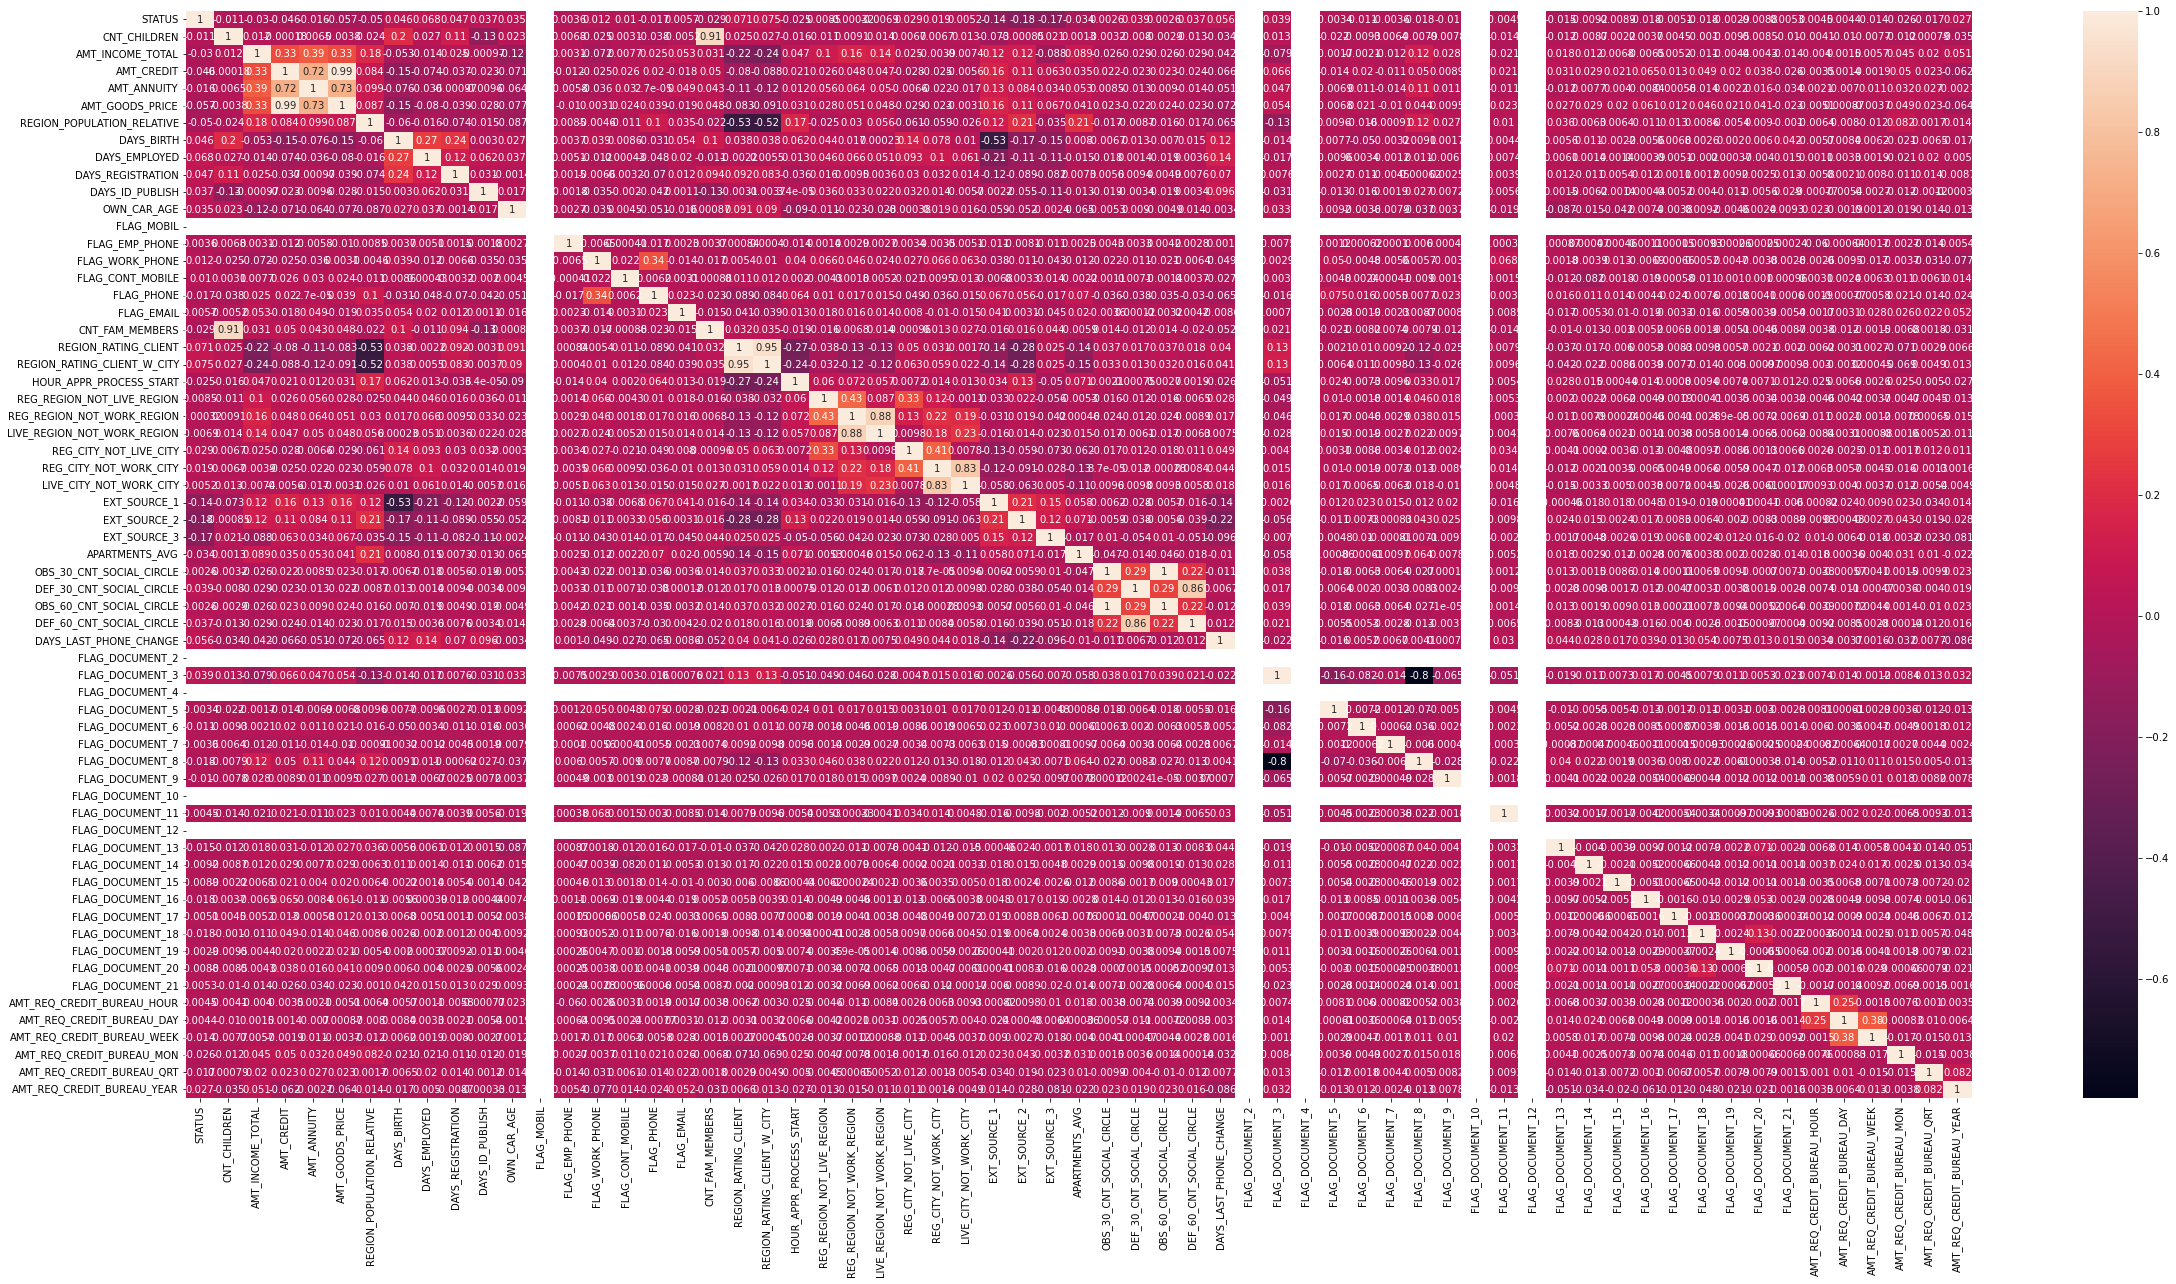

In [20]:
#Check for highly correlated variables 
cor = df_filtered_forsc.corr() 
ig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True, ax=ax)
plt.show()

In [21]:
sol = (df_filtered_forsc.corr().where(np.triu(np.ones(df_filtered_forsc.corr().shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

corr_df = pd.DataFrame(sol)
corr_df.head(20)

,,0
OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998512
AMT_CREDIT,AMT_GOODS_PRICE,0.985418
REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.947712
CNT_CHILDREN,CNT_FAM_MEMBERS,0.912081
REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.884948
DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.858366
REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,0.832732
AMT_ANNUITY,AMT_GOODS_PRICE,0.726189
AMT_CREDIT,AMT_ANNUITY,0.724128
REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,0.428720


# Data Preparation


**Drop highly correlated variables (correlation > 0.7)**

In [22]:
drop_col = ['OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_GOODS_PRICE','REGION_RATING_CLIENT_W_CITY','CNT_FAM_MEMBERS',
            'LIVE_REGION_NOT_WORK_REGION','DEF_60_CNT_SOCIAL_CIRCLE','LIVE_CITY_NOT_WORK_CITY', 'AMT_GOODS_PRICE',
            'AMT_ANNUITY']
df_filtered_forsc.drop(columns= drop_col, inplace= True)

In [24]:
df_filtered_forsc #19354 rows × 65 columns 

,STATUS,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
13,0,Cash loans,Y,N,1,225000.0,918468.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-14086,-3028,-643.0,-4911,23.0,1,1,0,1,0,0,Drivers,2,THURSDAY,13,0,0,0,0,Self-employed,NaN,0.566907,0.770087,0.1474,0.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
16,0,Cash loans,N,N,0,108000.0,509602.5,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931,-1317,-6392.0,-3866,NaN,1,1,0,1,0,0,Drivers,2,THURSDAY,12,0,0,1,1,Government,NaN,0.236378,0.062103,NaN,0.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
24,0,Cash loans,Y,N,2,135000.0,247500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286,-746,-108.0,-3729,7.0,1,1,0,1,0,0,Drivers,2,THURSDAY,14,0,0,0,1,Business Entity Type 3,NaN,0.786179,0.565608,0.1433,1.0,1.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
33,0,Cash loans,Y,N,1,360000.0,733315.5,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,3.0,1,1,0,1,0,0,Drivers,2,THURSDAY,10,0,0,1,1,Self-employed,NaN,0.321745,0.411849,NaN,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
37,0,Cash loans,N,Y,0,121500.0,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.030755,-21077,-1288,-5474.0,-4270,NaN,1,1,0,1,1,0,Drivers,2,FRIDAY,10,0,0,0,1,Transport: type 4,0.804586,0.719799,0.722393,NaN,0.0,0.0,-1541.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307425,0,Revolving loans,Y,Y,2,234000.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.022800,-11943,-3214,-5994.0,-3520,7.0,1,1,0,1,0,0,Drivers,2,FRIDAY,13,0,1,0,1,Industry: type 9,0.216368,0.414246,0.384207,NaN,0.0,0.0,-1911.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307432,0,Cash loans,N,Y,0,135000.0,840951.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009175,-18146,-379,-10348.0,-1691,NaN,1,1,1,1,0,0,Drivers,2,SUNDAY,9,0,0,0,1,Agriculture,0.550233,0.655284,0.235311,NaN,1.0,0.0,-124.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307446,1,Cash loans,N,N,0,270000.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010006,-10130,-1290,-1862.0,-2772,NaN,1,1,0,1,0,0,Drivers,2,FRIDAY,14,0,0,0,0,Construction,NaN,0.348737,NaN,0.0928

**Combine flag documents & drop individual flag documents**

In [25]:
flag_docu_list = list(total_null_values_by_col.filter(like="FLAG_DOCUMENT_", axis = 0).index)
return_str = ''
for i in range(len(flag_docu_list)):
    return_str += f"df_filtered_forsc['{flag_docu_list[i]}'] +"
    
print (return_str)

df_filtered_forsc['FLAG_DOCUMENT_2'] +df_filtered_forsc['FLAG_DOCUMENT_3'] +df_filtered_forsc['FLAG_DOCUMENT_4'] +df_filtered_forsc['FLAG_DOCUMENT_5'] +df_filtered_forsc['FLAG_DOCUMENT_6'] +df_filtered_forsc['FLAG_DOCUMENT_7'] +df_filtered_forsc['FLAG_DOCUMENT_8'] +df_filtered_forsc['FLAG_DOCUMENT_9'] +df_filtered_forsc['FLAG_DOCUMENT_10'] +df_filtered_forsc['FLAG_DOCUMENT_11'] +df_filtered_forsc['FLAG_DOCUMENT_12'] +df_filtered_forsc['FLAG_DOCUMENT_13'] +df_filtered_forsc['FLAG_DOCUMENT_14'] +df_filtered_forsc['FLAG_DOCUMENT_15'] +df_filtered_forsc['FLAG_DOCUMENT_16'] +df_filtered_forsc['FLAG_DOCUMENT_17'] +df_filtered_forsc['FLAG_DOCUMENT_18'] +df_filtered_forsc['FLAG_DOCUMENT_19'] +df_filtered_forsc['FLAG_DOCUMENT_20'] +df_filtered_forsc['FLAG_DOCUMENT_21'] +


In [26]:
df_filtered_forsc['TOTAL_FLAG_DOCUMENT'] = df_filtered_forsc['FLAG_DOCUMENT_2'] +df_filtered_forsc['FLAG_DOCUMENT_3'] +df_filtered_forsc['FLAG_DOCUMENT_4'] +df_filtered_forsc['FLAG_DOCUMENT_5'] +df_filtered_forsc['FLAG_DOCUMENT_6'] +df_filtered_forsc['FLAG_DOCUMENT_7'] +df_filtered_forsc['FLAG_DOCUMENT_8'] +df_filtered_forsc['FLAG_DOCUMENT_9'] +df_filtered_forsc['FLAG_DOCUMENT_10'] +df_filtered_forsc['FLAG_DOCUMENT_11'] +df_filtered_forsc['FLAG_DOCUMENT_12'] +df_filtered_forsc['FLAG_DOCUMENT_13'] +df_filtered_forsc['FLAG_DOCUMENT_14'] +df_filtered_forsc['FLAG_DOCUMENT_15'] +df_filtered_forsc['FLAG_DOCUMENT_16'] +df_filtered_forsc['FLAG_DOCUMENT_17'] +df_filtered_forsc['FLAG_DOCUMENT_18'] +df_filtered_forsc['FLAG_DOCUMENT_19'] +df_filtered_forsc['FLAG_DOCUMENT_20'] +df_filtered_forsc['FLAG_DOCUMENT_21']


In [27]:
df_filtered_forsc.drop(columns=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], inplace=True)
#36 columns left

In [28]:
columns_infoDF = show_missing(df_filtered_forsc)
columns_infoDF

,variable,dtype,count,unique,missing,pc_missing
0,STATUS,int64,19354,2,0,0.00
1,NAME_CONTRACT_TYPE,object,19354,2,0,0.00
2,FLAG_OWN_CAR,object,19354,2,0,0.00
3,FLAG_OWN_REALTY,object,19354,2,0,0.00
4,CNT_CHILDREN,int64,19354,8,0,0.00
5,AMT_INCOME_TOTAL,float64,19354,253,0,0.00
6,AMT_CREDIT,float64,19354,2410,0,0.00
7,NAME_TYPE_SUITE,object,19354,8,85,0.44
8,NAME_INCOME_TYPE,object,19354,4,0,0.00
9,NAME_EDUCATION_TYPE,object,19354,5,0,0.00


In [29]:
total_null_values_by_col = pd.DataFrame(df_filtered_forsc.isnull().sum(axis = 0))
total_null_values_by_col['pct_null'] = (total_null_values_by_col[0]/(len(df_filtered_forsc)) * 100).round(5)
total_null_values_by_col.sort_values(by= 0, ascending= False)

,0,pct_null
EXT_SOURCE_1,12075,62.39020
APARTMENTS_AVG,10802,55.81275
OWN_CAR_AGE,6302,32.56174
EXT_SOURCE_3,4123,21.30309
AMT_REQ_CREDIT_BUREAU_QRT,2749,14.20378
AMT_REQ_CREDIT_BUREAU_MON,2749,14.20378
AMT_REQ_CREDIT_BUREAU_WEEK,2749,14.20378
AMT_REQ_CREDIT_BUREAU_DAY,2749,14.20378
AMT_REQ_CREDIT_BUREAU_HOUR,2749,14.20378
AMT_REQ_CREDIT_BUREAU_YEAR,2749,14.20378


**Drop columns with more than 50% missing values & AMT_REQ_CREDIT_BUREAU_xxx repetition**

In [30]:
df_filtered_forsc.drop(columns=[ 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], inplace= True)


In [31]:
total_null_values_by_col = pd.DataFrame(df_filtered_forsc.isnull().sum(axis = 0))
total_null_values_by_col['pct_null'] = (total_null_values_by_col[0]/(len(df_filtered_forsc)) * 100).round(5)
total_null_values_by_col.sort_values(by= 0, ascending= False)

,0,pct_null
OWN_CAR_AGE,6302,32.56174
EXT_SOURCE_3,4123,21.30309
NAME_TYPE_SUITE,85,0.43919
DEF_30_CNT_SOCIAL_CIRCLE,40,0.20668
OBS_30_CNT_SOCIAL_CIRCLE,40,0.20668
EXT_SOURCE_2,30,0.15501
STATUS,0,0.00000
HOUR_APPR_PROCESS_START,0,0.00000
FLAG_EMAIL,0,0.00000
OCCUPATION_TYPE,0,0.00000


**Drop columns with only 1 unique value**

In [32]:
unique_var_df = columns_infoDF[columns_infoDF['unique'] == 1]
cat_var_list = list(unique_var_df['variable'])
print(str(len(cat_var_list)) + " Categorical Variables are " + str(cat_var_list))

1 Categorical Variables are ['FLAG_MOBIL']


In [33]:
df_filtered_forsc.drop(columns=['FLAG_MOBIL'], inplace=True)
#39 columns left


In [34]:
columns_infoDF = show_missing(df_filtered_forsc)
columns_infoDF


,variable,dtype,count,unique,missing,pc_missing
0,STATUS,int64,19354,2,0,0.00
1,NAME_CONTRACT_TYPE,object,19354,2,0,0.00
2,FLAG_OWN_CAR,object,19354,2,0,0.00
3,FLAG_OWN_REALTY,object,19354,2,0,0.00
4,CNT_CHILDREN,int64,19354,8,0,0.00
5,AMT_INCOME_TOTAL,float64,19354,253,0,0.00
6,AMT_CREDIT,float64,19354,2410,0,0.00
7,NAME_TYPE_SUITE,object,19354,8,85,0.44
8,NAME_INCOME_TYPE,object,19354,4,0,0.00
9,NAME_EDUCATION_TYPE,object,19354,5,0,0.00


# Creating Scorecard

**Scorecardpy requires an older version of pandas to be able to accomodate missing values**

So remove missing values for now to be able to test out scorecardpy

### Drop NA

In [38]:
# sample code
df_filtered_forsc.dropna(inplace=True)
#df_filtered_forsc.fillna('Missing')
df_filtered_forsc.shape #10410 rows × 38 columns 


(10410, 38)

### Categorical Variables

In [39]:
cat_var_df = columns_infoDF[(columns_infoDF['dtype'] == 'object') |  (columns_infoDF['unique'] == 2)]
cat_var_df
# cat_var_df.info() => 11 categorical variables 

,variable,dtype,count,unique,missing,pc_missing
0,STATUS,int64,19354,2,0,0.00
1,NAME_CONTRACT_TYPE,object,19354,2,0,0.00
2,FLAG_OWN_CAR,object,19354,2,0,0.00
3,FLAG_OWN_REALTY,object,19354,2,0,0.00
7,NAME_TYPE_SUITE,object,19354,8,85,0.44
8,NAME_INCOME_TYPE,object,19354,4,0,0.00
9,NAME_EDUCATION_TYPE,object,19354,5,0,0.00
10,NAME_FAMILY_STATUS,object,19354,5,0,0.00
11,NAME_HOUSING_TYPE,object,19354,6,0,0.00
18,FLAG_EMP_PHONE,int64,19354,2,0,0.00


In [40]:
# categorical variables's  list
cat_var_df = list(cat_var_df['variable'])
print(str(len(cat_var_df)) + " Categorical Variables are " + str(cat_var_df))

21 Categorical Variables are ['STATUS', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE']


### Continous Variables

In [41]:
# 18 continousvariables left
cont_var_df = columns_infoDF[(columns_infoDF['dtype'] != 'object') &  (columns_infoDF['unique'] > 2)]
cont_var_df
# cont_var_df.info() => 62 continous variables

,variable,dtype,count,unique,missing,pc_missing
4,CNT_CHILDREN,int64,19354,8,0,0.00
5,AMT_INCOME_TOTAL,float64,19354,253,0,0.00
6,AMT_CREDIT,float64,19354,2410,0,0.00
12,REGION_POPULATION_RELATIVE,float64,19354,79,0,0.00
13,DAYS_BIRTH,int64,19354,10224,0,0.00
14,DAYS_EMPLOYED,int64,19354,5357,0,0.00
15,DAYS_REGISTRATION,float64,19354,9007,0,0.00
16,DAYS_ID_PUBLISH,int64,19354,5213,0,0.00
17,OWN_CAR_AGE,float64,19354,53,6302,32.56
24,REGION_RATING_CLIENT,int64,19354,3,0,0.00


In [42]:
# continous variables's  list
cont_var_df = list(cont_var_df['variable'])
print(str(len(cont_var_df)) + " Continuous Variables are " + str(cont_var_df))

17 Continuous Variables are ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'TOTAL_FLAG_DOCUMENT']


<AxesSubplot:>

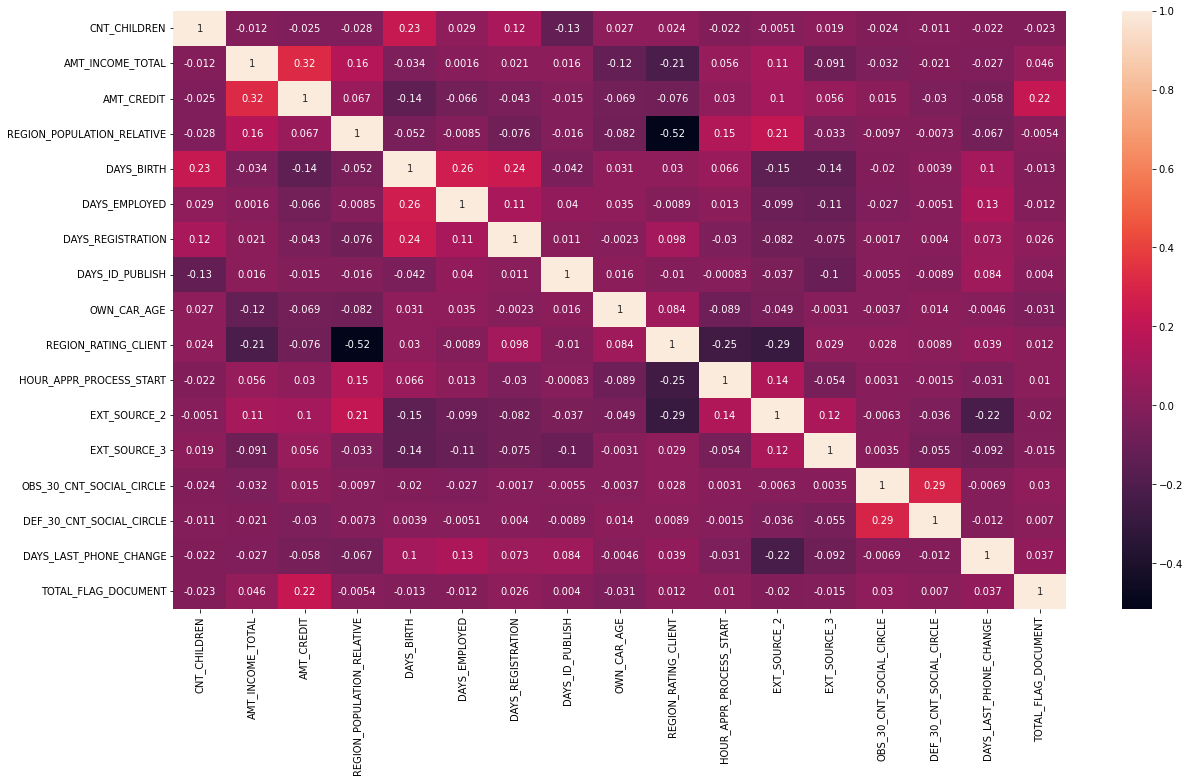

In [43]:
# 52 continous variables
continuous_df = df_filtered_forsc[cont_var_df]
corr_df = continuous_df.corr()

plt.subplots(figsize=(20,11))
sns.heatmap(corr_df, annot=True)
# 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'

In [44]:
df_filtered_forsc['STATUS'].value_counts()

0    9389
1    1021
Name: STATUS, dtype: int64

In [45]:
df_filtered_forsc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10410 entries, 13 to 307494
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   STATUS                      10410 non-null  int64  
 1   NAME_CONTRACT_TYPE          10410 non-null  object 
 2   FLAG_OWN_CAR                10410 non-null  object 
 3   FLAG_OWN_REALTY             10410 non-null  object 
 4   CNT_CHILDREN                10410 non-null  int64  
 5   AMT_INCOME_TOTAL            10410 non-null  float64
 6   AMT_CREDIT                  10410 non-null  float64
 7   NAME_TYPE_SUITE             10410 non-null  object 
 8   NAME_INCOME_TYPE            10410 non-null  object 
 9   NAME_EDUCATION_TYPE         10410 non-null  object 
 10  NAME_FAMILY_STATUS          10410 non-null  object 
 11  NAME_HOUSING_TYPE           10410 non-null  object 
 12  REGION_POPULATION_RELATIVE  10410 non-null  float64
 13  DAYS_BIRTH                  1

**Generate WOE bins**

Woebin() generate groupings as a python dictionary object and also provides a method to plot WOE for the bins.  It will optimize for IV, but will not attempt to make the trend monotonic.

In [46]:
df_filtered_forsc.drop(columns='ORGANIZATION_TYPE', inplace=True)

In [55]:
df_filtered_forsc.shape

(10410, 18)

In [47]:
# automatically calculate bin ranges 
bins = sc.woebin(df_filtered_forsc, 'STATUS')

# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables , " : ")
    display(bindetails)
    print("--"*50)
    
# look at less that -0.1 as bad predictive

[INFO] creating woe binning ...
Binning on 10410 rows and 36 columns in 00:00:10
DEF_30_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DEF_30_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",9233,0.886936,8367,866,0.093794,-0.049410,0.002123,0.016414,1.0,False
1,DEF_30_CNT_SOCIAL_CIRCLE,"[1.0,inf)",1177,0.113064,1022,155,0.131691,0.332665,0.014292,0.016414,inf,False


----------------------------------------------------------------------------------------------------
DAYS_ID_PUBLISH  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_ID_PUBLISH,"[-inf,-4700.0)",976,0.093756,904,72,0.073770,-0.311407,0.008023,0.022084,-4700.0,False
1,DAYS_ID_PUBLISH,"[-4700.0,-3100.0)",4383,0.421037,3984,399,0.091034,-0.082324,0.002761,0.022084,-3100.0,False
2,DAYS_ID_PUBLISH,"[-3100.0,-2700.0)",793,0.076177,692,101,0.127364,0.294291,0.007422,0.022084,-2700.0,False
3,DAYS_ID_PUBLISH,"[-2700.0,-800.0)",3067,0.294621,2753,314,0.102380,0.047703,0.000683,0.022084,-800.0,False
4,DAYS_ID_PUBLISH,"[-800.0,inf)",1191,0.114409,1056,135,0.113350,0.161788,0.003196,0.022084,inf,False


----------------------------------------------------------------------------------------------------
FLAG_CONT_MOBILE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_CONT_MOBILE,"[-inf,inf)",10410,1.0,9389,1021,0.098079,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
NAME_HOUSING_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_HOUSING_TYPE,"Office apartment%,%Co-op apartment%,%Municipal...",9663,0.928242,8733,930,0.096243,-0.020923,0.000403,0.005092,"Office apartment%,%Co-op apartment%,%Municipal...",False
1,NAME_HOUSING_TYPE,"With parents%,%Rented apartment",747,0.071758,656,91,0.121821,0.243455,0.004689,0.005092,"With parents%,%Rented apartment",False


----------------------------------------------------------------------------------------------------
REG_REGION_NOT_LIVE_REGION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_REGION_NOT_LIVE_REGION,"[-inf,inf)",10410,1.0,9389,1021,0.098079,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
OBS_30_CNT_SOCIAL_CIRCLE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OBS_30_CNT_SOCIAL_CIRCLE,"[-inf,1.0)",5349,0.513833,4830,519,0.097027,-0.011942,0.000073,0.002053,1.0,False
1,OBS_30_CNT_SOCIAL_CIRCLE,"[1.0,2.0)",1667,0.160134,1507,160,0.095981,-0.023946,0.000091,0.002053,2.0,False
2,OBS_30_CNT_SOCIAL_CIRCLE,"[2.0,3.0)",1034,0.099328,931,103,0.099613,0.017226,0.000030,0.002053,3.0,False
3,OBS_30_CNT_SOCIAL_CIRCLE,"[3.0,4.0)",746,0.071662,664,82,0.109920,0.127193,0.001220,0.002053,4.0,False
4,OBS_30_CNT_SOCIAL_CIRCLE,"[4.0,6.0)",879,0.084438,798,81,0.092150,-0.068903,0.000390,0.002053,6.0,False
5,OBS_30_CNT_SOCIAL_CIRCLE,"[6.0,inf)",735,0.070605,659,76,0.103401,0.058766,0.000250,0.002053,inf,False


----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_CREDIT,"[-inf,250000.0)",1509,0.144957,1384,125,0.082836,-0.185663,0.004637,0.071578,250000.0,False
1,AMT_CREDIT,"[250000.0,650000.0)",4564,0.438425,4009,555,0.121604,0.241427,0.028149,0.071578,650000.0,False
2,AMT_CREDIT,"[650000.0,700000.0)",550,0.052834,498,52,0.094545,-0.040600,0.000086,0.071578,700000.0,False
3,AMT_CREDIT,"[700000.0,1350000.0)",3195,0.306916,2933,262,0.082003,-0.196680,0.010970,0.071578,1350000.0,False
4,AMT_CREDIT,"[1350000.0,inf)",592,0.056868,565,27,0.045608,-0.822233,0.027736,0.071578,inf,False


----------------------------------------------------------------------------------------------------
REG_CITY_NOT_WORK_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_CITY_NOT_WORK_CITY,"[-inf,1.0)",6840,0.657061,6184,656,0.095906,-0.024804,0.000400,0.001145,1.0,False
1,REG_CITY_NOT_WORK_CITY,"[1.0,inf)",3570,0.342939,3205,365,0.102241,0.046186,0.000745,0.001145,inf,False


----------------------------------------------------------------------------------------------------
DAYS_REGISTRATION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_REGISTRATION,"[-inf,-9500.0)",801,0.076945,752,49,0.061174,-0.512160,0.016441,0.032977,-9500.0,False
1,DAYS_REGISTRATION,"[-9500.0,-8000.0)",948,0.091066,867,81,0.085443,-0.151834,0.001975,0.032977,-8000.0,False
2,DAYS_REGISTRATION,"[-8000.0,-7000.0)",745,0.071566,690,55,0.073826,-0.310602,0.006094,0.032977,-7000.0,False
3,DAYS_REGISTRATION,"[-7000.0,-1500.0)",5732,0.550624,5148,584,0.101884,0.042294,0.001002,0.032977,-1500.0,False
4,DAYS_REGISTRATION,"[-1500.0,inf)",2184,0.209798,1932,252,0.115385,0.181874,0.007465,0.032977,inf,False


----------------------------------------------------------------------------------------------------
FLAG_EMP_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_EMP_PHONE,"[-inf,inf)",10410,1.0,9389,1021,0.098079,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
CNT_CHILDREN  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,CNT_CHILDREN,"[-inf,1.0)",6406,0.615370,5781,625,0.097565,-0.005824,0.000021,0.012811,1.0,False
1,CNT_CHILDREN,"[1.0,2.0)",2522,0.242267,2242,280,0.111023,0.138422,0.004907,0.012811,2.0,False
2,CNT_CHILDREN,"[2.0,inf)",1482,0.142363,1366,116,0.078273,-0.247296,0.007883,0.012811,inf,False


----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_INCOME_TYPE,"Student%,%State servant%,%Commercial associate",3234,0.310663,2942,292,0.090291,-0.091335,0.002498,0.003566,"Student%,%State servant%,%Commercial associate",False
1,NAME_INCOME_TYPE,Working,7176,0.689337,6447,729,0.101589,0.039060,0.001068,0.003566,Working,False


----------------------------------------------------------------------------------------------------
FLAG_EMAIL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_EMAIL,"[-inf,inf)",10410,1.0,9389,1021,0.098079,0.0,0.0,0.0,inf,False


----------------------------------------------------------------------------------------------------
NAME_FAMILY_STATUS  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_FAMILY_STATUS,Married,8090,0.777137,7352,738,0.091224,-0.080028,0.004820,0.02024,Married,False
1,NAME_FAMILY_STATUS,Single / not married,995,0.095581,880,115,0.115578,0.183766,0.003475,0.02024,Single / not married,False
2,NAME_FAMILY_STATUS,"Separated%,%Civil marriage%,%Widow",1325,0.127281,1157,168,0.126792,0.289135,0.011946,0.02024,"Separated%,%Civil marriage%,%Widow",False


----------------------------------------------------------------------------------------------------
DAYS_LAST_PHONE_CHANGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_LAST_PHONE_CHANGE,"[-inf,-2000.0)",1533,0.147262,1430,103,0.067189,-0.411944,0.021184,0.039481,-2000.0,False
1,DAYS_LAST_PHONE_CHANGE,"[-2000.0,-1700.0)",958,0.092027,860,98,0.102296,0.046791,0.000205,0.039481,-1700.0,False
2,DAYS_LAST_PHONE_CHANGE,"[-1700.0,-1500.0)",847,0.081364,787,60,0.070838,-0.355127,0.008898,0.039481,-1500.0,False
3,DAYS_LAST_PHONE_CHANGE,"[-1500.0,-700.0)",2517,0.241787,2263,254,0.100914,0.031644,0.000245,0.039481,-700.0,False
4,DAYS_LAST_PHONE_CHANGE,"[-700.0,inf)",4555,0.437560,4049,506,0.111087,0.139068,0.008948,0.039481,inf,False


----------------------------------------------------------------------------------------------------
EXT_SOURCE_2  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EXT_SOURCE_2,"[-inf,0.2)",850,0.081652,661,189,0.222353,0.966749,0.110897,0.249273,0.2,False
1,EXT_SOURCE_2,"[0.2,0.4)",1598,0.153506,1368,230,0.143930,0.435730,0.034670,0.249273,0.4,False
2,EXT_SOURCE_2,"[0.4,0.7000000000000001)",6409,0.615658,5872,537,0.083788,-0.173196,0.017226,0.249273,0.7000000000000001,False
3,EXT_SOURCE_2,"[0.7000000000000001,inf)",1553,0.149183,1488,65,0.041854,-0.912045,0.086480,0.249273,inf,False


----------------------------------------------------------------------------------------------------
REG_CITY_NOT_LIVE_CITY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_CITY_NOT_LIVE_CITY,"[-inf,1.0)",9466,0.909318,8569,897,0.094760,-0.038094,0.001300,0.012548,1.0,False
1,REG_CITY_NOT_LIVE_CITY,"[1.0,inf)",944,0.090682,820,124,0.131356,0.329733,0.011248,0.012548,inf,False


----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_OWN_REALTY,N,3554,0.341402,3241,313,0.088070,-0.118678,0.004584,0.006799,N,False
1,FLAG_OWN_REALTY,Y,6856,0.658598,6148,708,0.103267,0.057318,0.002214,0.006799,Y,False


----------------------------------------------------------------------------------------------------
OWN_CAR_AGE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OWN_CAR_AGE,"[-inf,6.0)",2442,0.234582,2264,178,0.072891,-0.324349,0.021665,0.047845,6.0,False
1,OWN_CAR_AGE,"[6.0,7.0)",604,0.058021,543,61,0.100993,0.032521,0.000062,0.047845,7.0,False
2,OWN_CAR_AGE,"[7.0,12.0)",2833,0.272142,2579,254,0.089658,-0.099066,0.002567,0.047845,12.0,False
3,OWN_CAR_AGE,"[12.0,23.0)",3534,0.339481,3101,433,0.122524,0.250014,0.023455,0.047845,23.0,False
4,OWN_CAR_AGE,"[23.0,inf)",997,0.095773,902,95,0.095286,-0.031981,0.000097,0.047845,inf,False


----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_TYPE_SUITE,"Children%,%Spouse, partner",633,0.060807,580,53,0.083728,-0.173980,0.001716,0.002637,"Children%,%Spouse, partner",False
1,NAME_TYPE_SUITE,"Other_B%,%Unaccompanied",8443,0.811047,7616,827,0.097951,-0.001446,0.000002,0.002637,"Other_B%,%Unaccompanied",False
2,NAME_TYPE_SUITE,"Family%,%Other_A%,%Group of people",1334,0.128146,1193,141,0.105697,0.083290,0.000919,0.002637,"Family%,%Other_A%,%Group of people",False


----------------------------------------------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,WEEKDAY_APPR_PROCESS_START,SUNDAY,521,0.050048,481,40,0.076775,-0.268232,0.003233,0.00807,SUNDAY,False
1,WEEKDAY_APPR_PROCESS_START,"SATURDAY%,%MONDAY",3014,0.289529,2741,273,0.090577,-0.087850,0.002157,0.00807,"SATURDAY%,%MONDAY",False
2,WEEKDAY_APPR_PROCESS_START,"WEDNESDAY%,%THURSDAY%,%TUESDAY",5222,0.501633,4693,529,0.101302,0.035917,0.000657,0.00807,"WEDNESDAY%,%THURSDAY%,%TUESDAY",False
3,WEEKDAY_APPR_PROCESS_START,FRIDAY,1653,0.158790,1474,179,0.108288,0.110407,0.002023,0.00807,FRIDAY,False


----------------------------------------------------------------------------------------------------
REG_REGION_NOT_WORK_REGION  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REG_REGION_NOT_WORK_REGION,"[-inf,1.0)",9632,0.925264,8680,952,0.098837,0.008544,0.000068,0.000948,1.0,False
1,REG_REGION_NOT_WORK_REGION,"[1.0,inf)",778,0.074736,709,69,0.088689,-0.110993,0.000881,0.000948,inf,False


----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,OCCUPATION_TYPE,"Realty agents%,%Drivers",10410,1.0,9389,1021,0.098079,0.0,0.0,0.0,"Realty agents%,%Drivers",False


----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_CONTRACT_TYPE,Revolving loans,764,0.073391,712,52,0.068063,-0.398078,0.009913,0.010575,Revolving loans,False
1,NAME_CONTRACT_TYPE,Cash loans,9646,0.926609,8677,969,0.100456,0.026590,0.000662,0.010575,Cash loans,False


----------------------------------------------------------------------------------------------------
DAYS_BIRTH  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_BIRTH,"[-inf,-19000.0)",1692,0.162536,1560,132,0.078014,-0.250883,0.009249,0.025817,-19000.0,False
1,DAYS_BIRTH,"[-19000.0,-15000.0)",3688,0.354275,3339,349,0.094631,-0.039598,0.000547,0.025817,-15000.0,False
2,DAYS_BIRTH,"[-15000.0,-13500.0)",1550,0.148895,1412,138,0.089032,-0.106752,0.001626,0.025817,-13500.0,False
3,DAYS_BIRTH,"[-13500.0,-11000.0)",2138,0.205379,1905,233,0.108980,0.117557,0.002975,0.025817,-11000.0,False
4,DAYS_BIRTH,"[-11000.0,inf)",1342,0.128915,1173,169,0.125931,0.281335,0.011420,0.025817,inf,False


----------------------------------------------------------------------------------------------------
TOTAL_FLAG_DOCUMENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,TOTAL_FLAG_DOCUMENT,"[-inf,1.0)",744,0.07147,696,48,0.064516,-0.455392,0.012349,0.013131,1.0,False
1,TOTAL_FLAG_DOCUMENT,"[1.0,inf)",9666,0.92853,8693,973,0.100662,0.028867,0.000783,0.013131,inf,False


----------------------------------------------------------------------------------------------------
HOUR_APPR_PROCESS_START  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,HOUR_APPR_PROCESS_START,"[-inf,8.0)",717,0.068876,618,99,0.138075,0.387388,0.012064,0.021442,8.0,False
1,HOUR_APPR_PROCESS_START,"[8.0,11.0)",2705,0.259846,2427,278,0.102773,0.051966,0.000717,0.021442,11.0,False
2,HOUR_APPR_PROCESS_START,"[11.0,13.0)",2526,0.242651,2310,216,0.085511,-0.150968,0.005205,0.021442,13.0,False
3,HOUR_APPR_PROCESS_START,"[13.0,15.0)",1937,0.186071,1749,188,0.097057,-0.011601,0.000025,0.021442,15.0,False
4,HOUR_APPR_PROCESS_START,"[15.0,16.0)",863,0.082901,769,94,0.108922,0.116960,0.001189,0.021442,16.0,False
5,HOUR_APPR_PROCESS_START,"[16.0,inf)",1662,0.159654,1516,146,0.087846,-0.121468,0.002243,0.021442,inf,False


----------------------------------------------------------------------------------------------------
DAYS_EMPLOYED  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,DAYS_EMPLOYED,"[-inf,-5200.0)",636,0.061095,603,33,0.051887,-0.686653,0.021906,0.079179,-5200.0,False
1,DAYS_EMPLOYED,"[-5200.0,-1600.0)",4187,0.402209,3866,321,0.076666,-0.269778,0.026266,0.079179,-1600.0,False
2,DAYS_EMPLOYED,"[-1600.0,-1000.0)",1833,0.176081,1632,201,0.109656,0.124500,0.002869,0.079179,-1000.0,False
3,DAYS_EMPLOYED,"[-1000.0,inf)",3754,0.360615,3288,466,0.124134,0.264907,0.028138,0.079179,inf,False


----------------------------------------------------------------------------------------------------
EXT_SOURCE_3  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,EXT_SOURCE_3,"[-inf,0.30000000000000004)",1839,0.176657,1479,360,0.195759,0.805739,0.157176,0.29095,0.30000000000000004,False
1,EXT_SOURCE_3,"[0.30000000000000004,0.5)",2894,0.278002,2579,315,0.108846,0.116172,0.003931,0.29095,0.5,False
2,EXT_SOURCE_3,"[0.5,0.6000000000000001)",1712,0.164457,1583,129,0.075350,-0.288508,0.012191,0.29095,0.6000000000000001,False
3,EXT_SOURCE_3,"[0.6000000000000001,inf)",3965,0.380884,3748,217,0.054729,-0.630324,0.117652,0.29095,inf,False


----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_POPULATION_RELATIVE,"[-inf,0.01)",2397,0.230259,2131,266,0.110972,0.137906,0.004628,0.044756,0.01,False
1,REGION_POPULATION_RELATIVE,"[0.01,0.03)",5504,0.528722,4936,568,0.103198,0.056567,0.001731,0.044756,0.03,False
2,REGION_POPULATION_RELATIVE,"[0.03,0.04)",1775,0.170509,1621,154,0.086761,-0.135090,0.002947,0.044756,0.04,False
3,REGION_POPULATION_RELATIVE,"[0.04,inf)",734,0.070509,701,33,0.044959,-0.837244,0.035449,0.044756,inf,False


----------------------------------------------------------------------------------------------------
FLAG_WORK_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_WORK_PHONE,"[-inf,1.0)",8092,0.777329,7313,779,0.096268,-0.020642,0.000328,0.001434,1.0,False
1,FLAG_WORK_PHONE,"[1.0,inf)",2318,0.222671,2076,242,0.104400,0.069496,0.001106,0.001434,inf,False


----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,NAME_EDUCATION_TYPE,"Academic degree%,%Higher education",1223,0.117483,1130,93,0.076043,-0.278617,0.008154,0.009112,"Academic degree%,%Higher education",False
1,NAME_EDUCATION_TYPE,"Incomplete higher%,%Lower secondary%,%Secondar...",9187,0.882517,8259,928,0.101012,0.032729,0.000958,0.009112,"Incomplete higher%,%Lower secondary%,%Secondar...",False


----------------------------------------------------------------------------------------------------
FLAG_PHONE  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,FLAG_PHONE,"[-inf,1.0)",7617,0.7317,6858,759,0.099646,0.017587,0.000228,0.000866,1.0,False
1,FLAG_PHONE,"[1.0,inf)",2793,0.2683,2531,262,0.093806,-0.049269,0.000639,0.000866,inf,False


----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,REGION_RATING_CLIENT,"[-inf,2.0)",1087,0.104419,1028,59,0.054278,-0.639077,0.033042,0.056481,2.0,False
1,REGION_RATING_CLIENT,"[2.0,3.0)",7802,0.749472,7047,755,0.096770,-0.014883,0.000165,0.056481,3.0,False
2,REGION_RATING_CLIENT,"[3.0,inf)",1521,0.146110,1314,207,0.136095,0.370644,0.023273,0.056481,inf,False


----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


,variable,bin,count,count_distr,good,bad,badprob,woe,bin_iv,total_iv,breaks,is_special_values
0,AMT_INCOME_TOTAL,"[-inf,130000.0)",1732,0.166378,1529,203,0.117206,0.199593,0.007180,0.019478,130000.0,False
1,AMT_INCOME_TOTAL,"[130000.0,200000.0)",4250,0.408261,3810,440,0.103529,0.060147,0.001513,0.019478,200000.0,False
2,AMT_INCOME_TOTAL,"[200000.0,280000.0)",3196,0.307012,2914,282,0.088235,-0.116619,0.003984,0.019478,280000.0,False
3,AMT_INCOME_TOTAL,"[280000.0,inf)",1232,0.118348,1136,96,0.077922,-0.252164,0.006800,0.019478,inf,False


----------------------------------------------------------------------------------------------------


{'DEF_30_CNT_SOCIAL_CIRCLE': <Figure size 432x288 with 2 Axes>,
 'DAYS_ID_PUBLISH': <Figure size 432x288 with 2 Axes>,
 'FLAG_CONT_MOBILE': <Figure size 432x288 with 2 Axes>,
 'NAME_HOUSING_TYPE': <Figure size 432x288 with 2 Axes>,
 'REG_REGION_NOT_LIVE_REGION': <Figure size 432x288 with 2 Axes>,
 'OBS_30_CNT_SOCIAL_CIRCLE': <Figure size 432x288 with 2 Axes>,
 'AMT_CREDIT': <Figure size 432x288 with 2 Axes>,
 'REG_CITY_NOT_WORK_CITY': <Figure size 432x288 with 2 Axes>,
 'DAYS_REGISTRATION': <Figure size 432x288 with 2 Axes>,
 'FLAG_EMP_PHONE': <Figure size 432x288 with 2 Axes>,
 'CNT_CHILDREN': <Figure size 432x288 with 2 Axes>,
 'NAME_INCOME_TYPE': <Figure size 432x288 with 2 Axes>,
 'FLAG_EMAIL': <Figure size 432x288 with 2 Axes>,
 'NAME_FAMILY_STATUS': <Figure size 432x288 with 2 Axes>,
 'DAYS_LAST_PHONE_CHANGE': <Figure size 432x288 with 2 Axes>,
 'EXT_SOURCE_2': <Figure size 432x288 with 2 Axes>,
 'REG_CITY_NOT_LIVE_CITY': <Figure size 432x288 with 2 Axes>,
 'FLAG_OWN_REALTY': <Fi

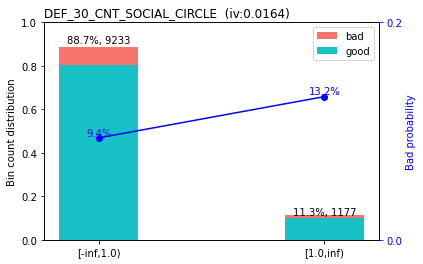

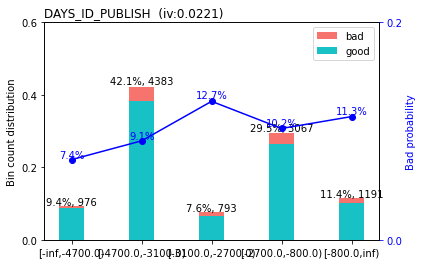

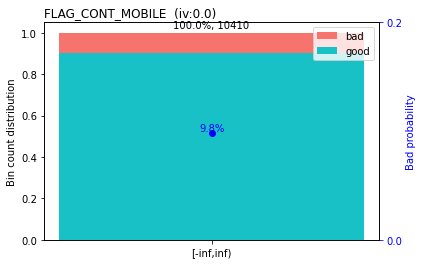

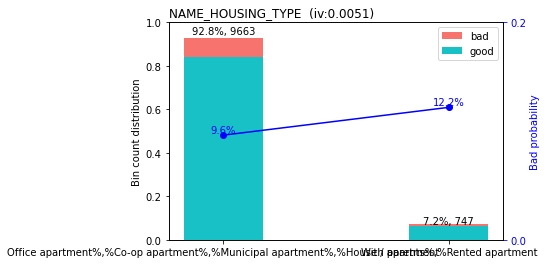

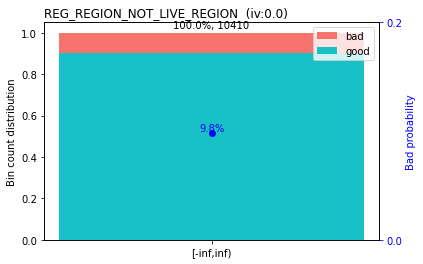

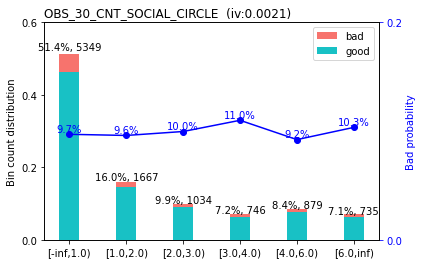

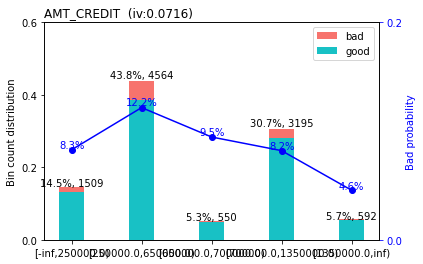

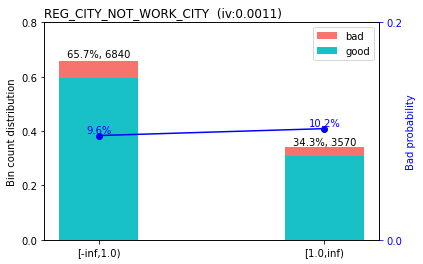

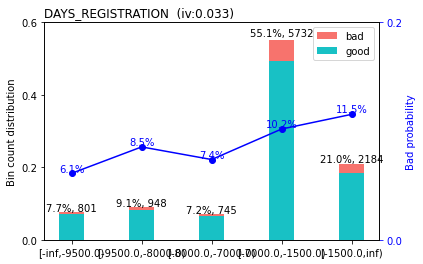

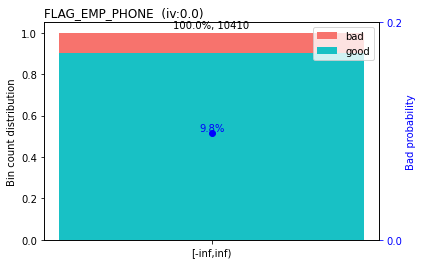

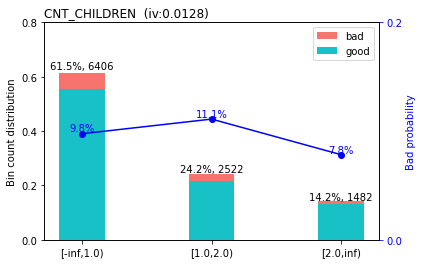

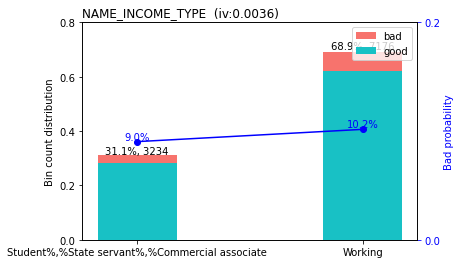

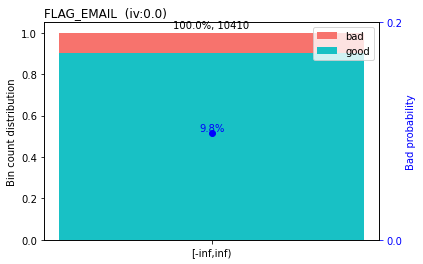

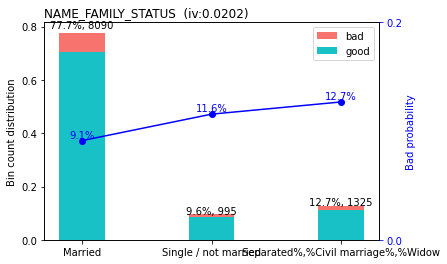

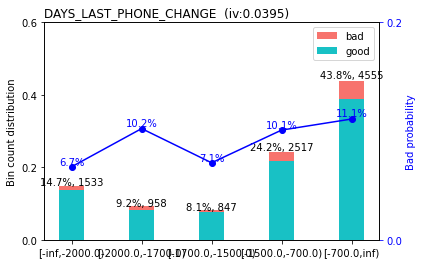

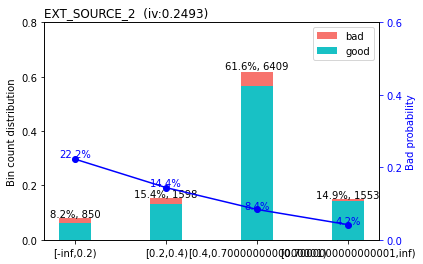

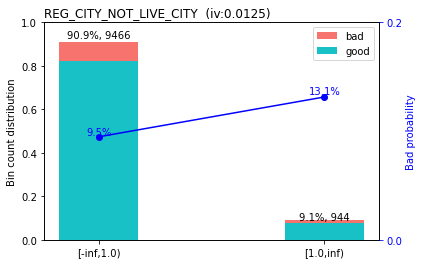

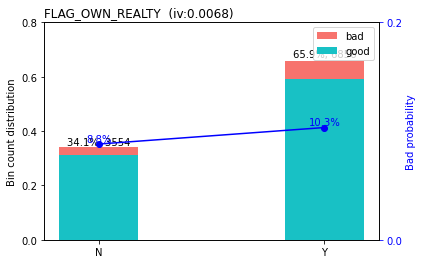

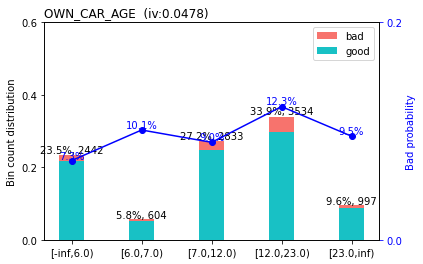

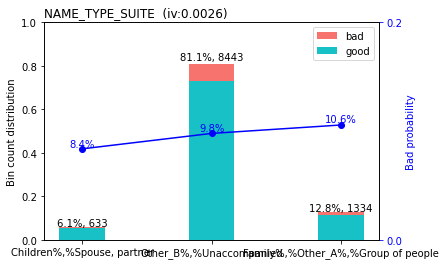

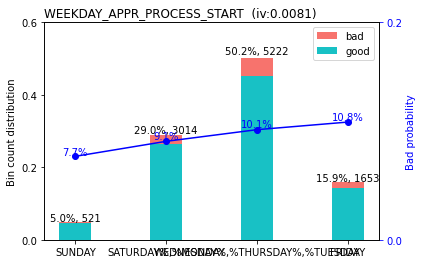

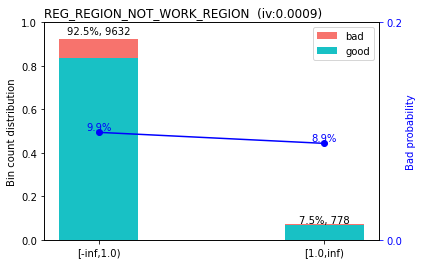

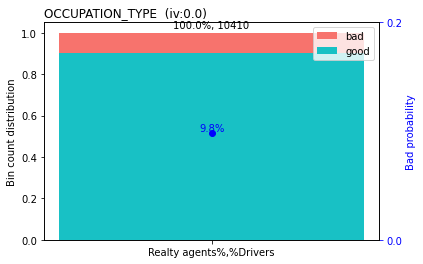

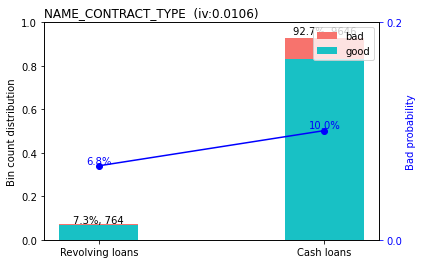

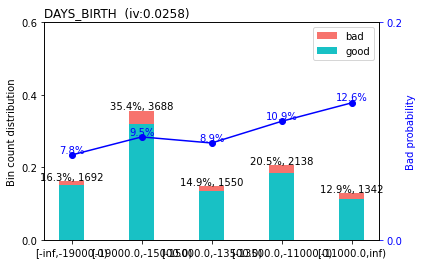

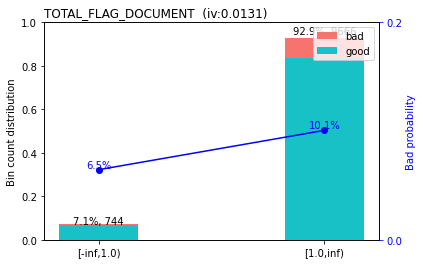

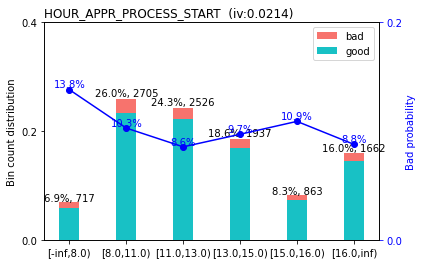

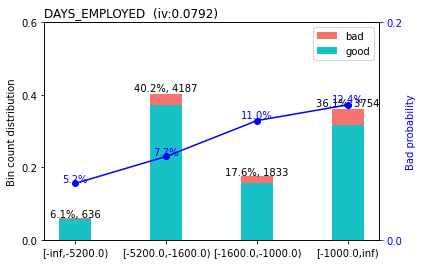

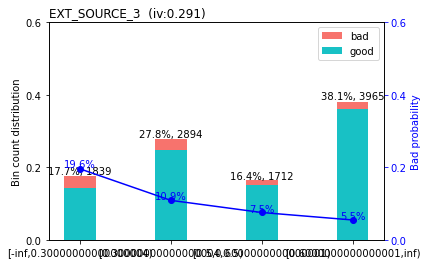

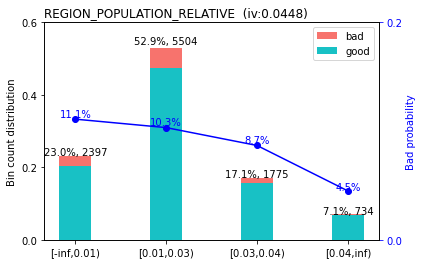

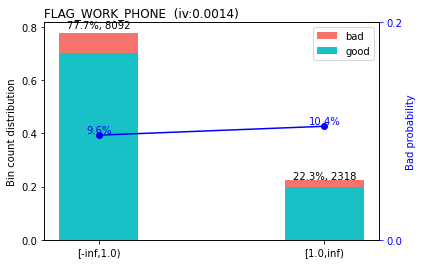

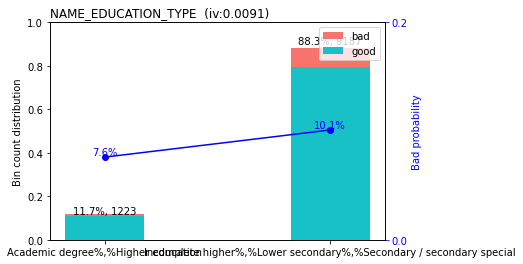

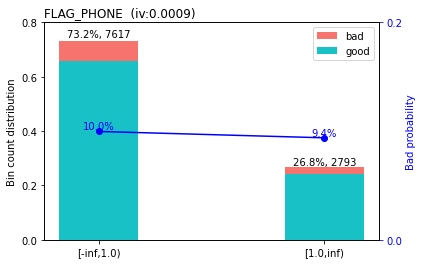

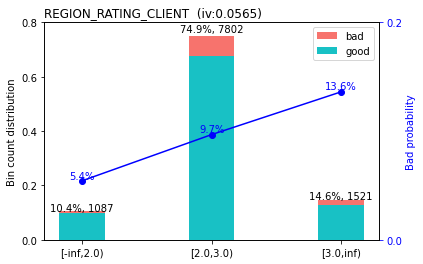

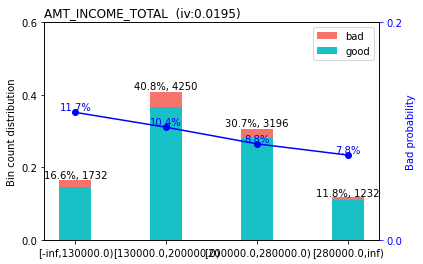

In [48]:
sc.woebin_plot(bins)

In [54]:
=0 
FD 5,21, 18, 13, 6
AMT_REQ_CREDIT_BUREAU_HOUR,
REG_CITY_NOT_LIVE_CITY
FLAG_CONT_MOBILE
AMT_REQ_CREDIT_BUREAU_DAY

<0
CNT_CHILDREN
HOUR_APPR_PROCESS_START
AMT_REQ_CREDIT_BUREAU_MON
NAME_FAMILY_STATUS
LIVE_REGION_NOT_WORK_REGION
NAME_EDUCATION_TYPE
FLAG_DOCUMENT_8
REGION_POPULATION_RELATIVE

0.1< x < 0.3
OWN_CAR_AGE
EXT_SOURCE_3
DAYS_EMPLOYED


0.3< x< 0.5
Org type - 0.6
>


SyntaxError: invalid syntax (2658639271.py, line 1)

In [40]:
# df_filtered_forsc.info()

### Logistic regression with WOE encoding

Do train-test split

Use sc.woebin_ply to encode the WOE values

Generate the logistic regression model based on the encoded WOE values

In [50]:
df_filtered_forsc.drop(columns = ["TOTAL_FLAG_DOCUMENT"]+
["CNT_CHILDREN"]+
["REG_CITY_NOT_LIVE_CITY"]+
["NAME_EDUCATION_TYPE"]+
["WEEKDAY_APPR_PROCESS_START"]+
["FLAG_OWN_REALTY"]+
["NAME_HOUSING_TYPE"]+
["NAME_INCOME_TYPE"]+
["NAME_TYPE_SUITE"]+
["OBS_30_CNT_SOCIAL_CIRCLE"]+
["FLAG_WORK_PHONE"]+
["REG_CITY_NOT_WORK_CITY"]+
["NAME_CONTRACT_TYPE"]+
["REG_REGION_NOT_WORK_REGION"]+
["FLAG_PHONE"]+
["FLAG_CONT_MOBILE"]+
["REG_REGION_NOT_LIVE_REGION"]+
["FLAG_EMP_PHONE"]+
["FLAG_EMAIL"]+
["OCCUPATION_TYPE"], inplace=True)

In [61]:
df_filtered_forsc.drop(columns =["FLAG_OWN_CAR"], inplace=True)

In [62]:
df_filtered_forsc

,STATUS,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
13,0,225000.0,918468.0,Married,0.016612,-14086,-3028,-643.0,-4911,23.0,2,13,0.566907,0.770087,0.0,-4.0
24,0,135000.0,247500.0,Married,0.026392,-11286,-746,-108.0,-3729,7.0,2,14,0.786179,0.565608,1.0,-4.0
33,0,360000.0,733315.5,Married,0.015221,-11694,-2060,-3557.0,-3557,3.0,2,10,0.321745,0.411849,0.0,-697.0
131,0,202500.0,1107981.0,Married,0.031329,-18413,-1895,-10826.0,-1947,15.0,2,10,0.668020,0.353988,0.0,-1192.0
169,0,135000.0,531000.0,Married,0.028663,-13116,-1786,-7237.0,-3168,1.0,2,10,0.748916,0.639708,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307374,0,270000.0,1042560.0,Married,0.011703,-13384,-4492,-104.0,-4648,8.0,2,9,0.758844,0.408359,0.0,-3384.0
307415,0,180000.0,589045.5,Married,0.008230,-17048,-1471,-9633.0,-578,6.0,2,12,0.162231,0.835777,0.0,0.0
307425,0,234000.0,450000.0,Married,0.022800,-11943,-3214,-5994.0,-3520,7.0,2,13,0.414246,0.384207,0.0,-1911.0
307491,0,90000.0,1078200.0,Married,0.019101,-10976,-1953,-5048.0,-3369,15.0,2,10,0.561158,0.716570,0.0,-1357.0


In [63]:
# sample code
# split data into 70% train and 30% test 1= bad result
train, test = sc.split_df(df_filtered_forsc, 'STATUS', ratio=0.7).values()
print(train.shape)
print(test.shape)

(7287, 16)
(3123, 16)


In [64]:
# sample code
# prepare a dataset with the WOE values for Logistic Regression training
# woebin_ply() converts original values of input data into woe
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


,STATUS,EXT_SOURCE_3_woe,REGION_POPULATION_RELATIVE_woe,EXT_SOURCE_2_woe,OWN_CAR_AGE_woe,AMT_CREDIT_woe,DEF_30_CNT_SOCIAL_CIRCLE_woe,DAYS_ID_PUBLISH_woe,DAYS_REGISTRATION_woe,DAYS_LAST_PHONE_CHANGE_woe,REGION_RATING_CLIENT_woe,DAYS_BIRTH_woe,AMT_INCOME_TOTAL_woe,NAME_FAMILY_STATUS_woe,HOUR_APPR_PROCESS_START_woe,DAYS_EMPLOYED_woe
13,0,-0.630324,0.056567,-0.173196,-0.031981,-0.196680,-0.049410,-0.311407,0.181874,0.139068,-0.014883,-0.106752,-0.116619,-0.080028,-0.011601,-0.269778
131,0,0.116172,-0.135090,-0.173196,0.250014,-0.196680,-0.049410,0.047703,-0.512160,0.031644,-0.014883,-0.039598,-0.116619,-0.080028,0.051966,-0.269778
169,0,-0.630324,0.056567,-0.912045,-0.324349,0.241427,-0.049410,-0.082324,-0.310602,0.139068,-0.014883,0.117557,0.060147,-0.080028,0.051966,-0.269778
199,0,-0.630324,0.056567,-0.173196,-0.099066,-0.196680,-0.049410,0.047703,0.042294,0.139068,-0.014883,-0.039598,0.199593,-0.080028,0.051966,-0.269778
218,0,-0.288508,-0.837244,-0.912045,-0.324349,-0.196680,0.332665,-0.082324,0.181874,0.139068,-0.639077,-0.250883,-0.252164,-0.080028,0.116960,-0.269778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307303,0,0.805739,0.056567,-0.912045,-0.324349,-0.196680,0.332665,-0.311407,0.181874,0.046791,-0.014883,-0.106752,-0.116619,-0.080028,-0.011601,-0.269778
307330,0,-0.288508,0.056567,-0.912045,-0.324349,0.241427,-0.049410,-0.082324,0.181874,-0.411944,0.370644,0.281335,0.060147,-0.080028,0.051966,-0.269778
307415,0,-0.630324,0.137906,0.966749,0.032521,0.241427,-0.049410,0.161788,-0.512160,0.139068,-0.014883,-0.039598,0.060147,-0.080028,-0.150968,0.124500
307425,0,0.116172,0.056567,-0.173196,-0.099066,0.241427,-0.049410,-0.082324,0.042294,0.046791,-0.014883,0.117557,-0.116619,-0.080028,-0.011601,-0.269778


In [ ]:
# X_train.info()

In [ ]:
# X_train.dtypes[X_train.dtypes == 'object'] == 'True'

In [ ]:
# X_train.drop(columns = ['FLAG_OWN_CAR', 'OCCUPATION_TYPE'])

In [ ]:
# y_train.value_counts()

In [65]:
# sample code
#create the X, y parts of data for train and test
y_train = train_woe.loc[:,'STATUS']
X_train = train_woe.loc[:,train_woe.columns != 'STATUS']
y_test = test_woe.loc[:,'STATUS']
X_test = test_woe.loc[:,train_woe.columns != 'STATUS']

#create a logistic regression model object
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[[ 0.874201    0.28528375  0.72585633  0.61242343  0.55238786  0.49950305
   0.50992306  0.65894558  0.39215233  0.08614642 -0.33109576  0.71028825
   0.6867207   0.55954367  0.57534152]]
[-2.21939928]


### Generate scorecard

Use sc.scorecard to generate the scorecard

In [66]:
# sample code

# generate a card from the model and bins
card = sc.scorecard(bins, lr, X_train.columns, points0 = 600, odds0 = 1/20, pdo = 20,
      basepoints_eq0 = True)

pprint.pprint(card)

{'AMT_CREDIT':       variable                   bin  points
17  AMT_CREDIT       [-inf,250000.0)    41.0
18  AMT_CREDIT   [250000.0,650000.0)    35.0
19  AMT_CREDIT   [650000.0,700000.0)    39.0
20  AMT_CREDIT  [700000.0,1350000.0)    42.0
21  AMT_CREDIT       [1350000.0,inf)    52.0,
 'AMT_INCOME_TOTAL':              variable                  bin  points
103  AMT_INCOME_TOTAL      [-inf,130000.0)    34.0
104  AMT_INCOME_TOTAL  [130000.0,200000.0)    37.0
105  AMT_INCOME_TOTAL  [200000.0,280000.0)    41.0
106  AMT_INCOME_TOTAL       [280000.0,inf)    44.0,
 'DAYS_BIRTH':       variable                  bin  points
69  DAYS_BIRTH      [-inf,-19000.0)    36.0
70  DAYS_BIRTH  [-19000.0,-15000.0)    38.0
71  DAYS_BIRTH  [-15000.0,-13500.0)    37.0
72  DAYS_BIRTH  [-13500.0,-11000.0)    40.0
73  DAYS_BIRTH       [-11000.0,inf)    41.0,
 'DAYS_EMPLOYED':          variable                bin  points
82  DAYS_EMPLOYED     [-inf,-5200.0)    50.0
83  DAYS_EMPLOYED  [-5200.0,-1600.0)    43.0
84  

In [ ]:
# card['bin points']

### Test scorecard

Use sc.scorecard_ply to score a new application with values
- LOAN = 88900
- VALUE = 57264
- REASON = DebtCon
- JOB = Other
- YOJ = 16.0
- DEROG = 0.0
- DELINQ = 0.0
- CLAGE = 221.8
- NINQ = 0.0
- CLNO = 16.0
- DEBTINC = 36.1

In [ ]:
# # sample code

# # calulate credit score for new application
# col = ['LOAN','VALUE','REASON','JOB','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
# val = [[88900,57264,'DebtCon','Other',16.0,0.0,0.0,221.8,0.0,16.0,36.1]]
# new_appl = pd.DataFrame(val, columns=col)

# new_appl_score = sc.scorecard_ply(new_appl, card, only_total_score=False).transpose()
# new_appl_score.index = new_appl_score.index.str.replace('_points', '')

# summary =  pd.concat([new_appl.transpose(), new_appl_score], axis=1)
# summary.columns = ['App Value','Points']
# print(summary)



### Score all the test and train data

Use sc.scorecard_ply to score all the test and train data and examine the distribution of the scores

Text(0.5, 1.0, 'test data scores')

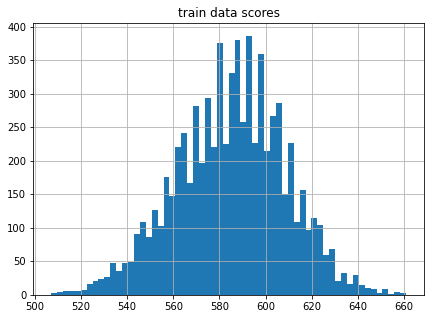

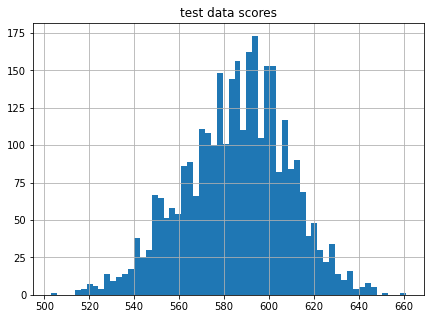

In [67]:
# sample code

# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

#distrubution of scores on test data
train_score.hist(figsize=(7,5),bins=60)
plt.title('train data scores')
test_score.hist(figsize=(7,5),bins=60)
plt.title('test data scores')

**Calculate Percentage Correctly Classified measures on LR model**

In [68]:
# sample code
# print evaluation metrics of the model
y_pred = lr.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_pred, y_test))
print("\nPCC measures:")
print(classification_report(y_pred, y_test))



Confusion matrix:
[[2817  305]
 [   0    1]]

PCC measures:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3122
           1       0.00      1.00      0.01         1

    accuracy                           0.90      3123
   macro avg       0.50      0.95      0.48      3123
weighted avg       1.00      0.90      0.95      3123



**Evaluate the performance of logistic regression model with ROC**

Generate the ROC and calculate the AUC for the model using the scorecardpy methods. 

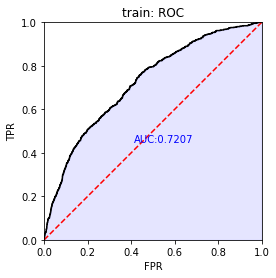

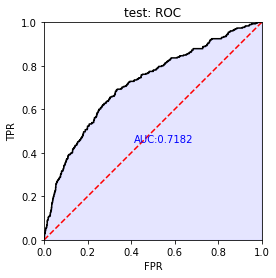

In [69]:
# sample code 

# evaluate the performance of the logistic regression
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc
train_perf = sc.perf_eva(y_train, train_pred, plot_type=['roc'], title = "train")
test_perf = sc.perf_eva(y_test, test_pred, plot_type=['roc'], title = "test")

**Evaluate the performance of logistic regression model with ROC**

1. Go to where WOE and IV are calculated and find which variables have weak IV.  *Hint: check bin_iv column where <0.1*

2. Look at the scorecard and check what the difference in points bretween the range of values for those variables.  What is the largest range difference?

3. Go back to where MORTDUE was dropped and also drop the weak IV variables there, rerun the model and performance evaluation.  How did dropping those variable have a significant affect the model's performance?  


In [53]:
df_filtered_forsc.columns

Index(['STATUS', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUR